## **Introduction**

In this project, we aim to analyze and predict the cost of medical treatment for different patients using a dataset that encompasses various factors influencing healthcare expenses. While specific diagnosis information is unavailable, we have a rich set of attributes including demographic details, lifestyle factors, and geographic information. Through regression analysis, we seek to understand how these variables correlate with and predict medical charges, providing insights that can aid in cost estimation and healthcare planning.

In [28]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


## **About the data**

The dataset contains information on patients' attributes and their corresponding medical charges. Key variables include age, gender, body mass index (BMI), number of children, smoking status, and region of residence. These attributes serve as predictors in our analysis to model and predict the cost of treatment. The dataset is sourced from medical records and encompasses a diverse patient population, reflecting real-world scenarios in healthcare settings.

In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Exploratory Data Analysis**

In [5]:
## Checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

All columns, including age, sex, BMI, children, smoker, region, and charges, have no missing values.

In [6]:
## Checking for data statistics and determining the quality of data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


No visible outlier data

**Encoding Strategies for Categorical Variables**

Columns Sex and smoker are natural candidates for label encoding. They are binary categorical variables. Label encoding is efficient for binary variables, as it assigns a unique integer to each category, simplifying the model's interpretation and processing.

Generally, categorical variables with high variability are best encoded using OneHotEncoder, among other techniques. However, in this specific case, no change is necessary because there is no inherent order to the regions being listed.

In [7]:
## Converting the string columns to categorical values using Label Encoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


##**Perform Correlation Analysis**

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


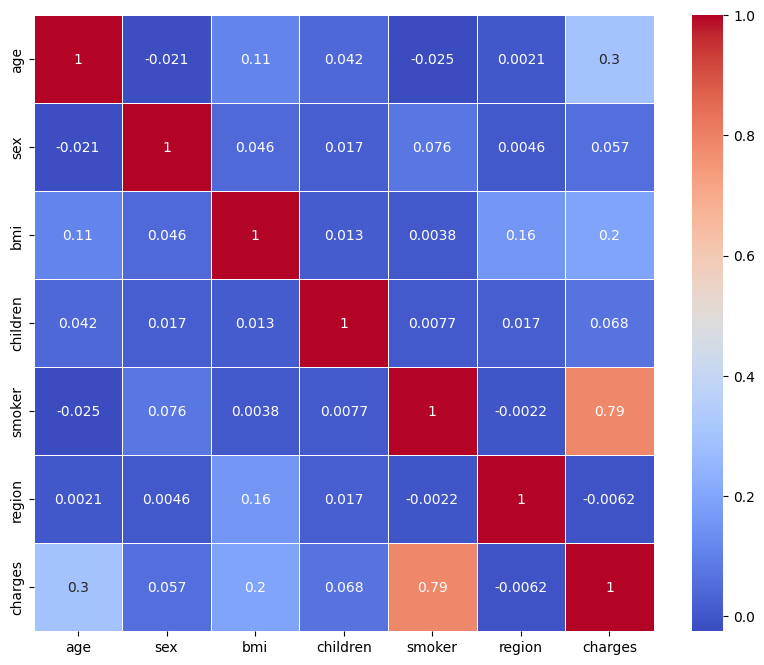

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

Here are the observations and insights from the correlation matrix:

1. **Age and Charges**:
   - The positive correlation (0.299) between age and charges suggests that as people age, their medical expenses tend to increase. This might be due to the higher prevalence of chronic diseases and health issues among older individuals, leading to higher medical costs.

2. **Smoker and Charges**:
   - The strong positive correlation (0.787) between being a smoker and charges indicates that smokers generally incur much higher medical expenses compared to non-smokers. This is likely due to the numerous health risks associated with smoking, such as lung cancer, heart disease, and respiratory problems, which result in higher medical costs.

3. **BMI and Charges**:
   - The weak positive correlation (0.198) between BMI and charges implies that individuals with higher BMI might have slightly higher medical expenses. Higher BMI is often associated with health issues like obesity, diabetes, and cardiovascular diseases, which can lead to increased medical costs, but the correlation is not very strong in this dataset.

4. **Region and Charges**:
   - The near-zero correlation (-0.006) between region and charges suggests that the region where individuals live does not significantly impact their medical expenses in this dataset. This could mean that healthcare costs are relatively uniform across different regions or that regional differences are not substantial enough to show a strong correlation.

5. **Sex and Charges**:
   - The very weak positive correlation (0.057) between sex and charges indicates that there is almost no difference in medical expenses between males and females in this dataset. This suggests that gender does not play a significant role in determining medical costs.

6. **Age and BMI**:
   - There is a weak positive correlation (0.109) between age and BMI, indicating that BMI tends to slightly increase with age. This could be due to metabolic changes and lifestyle factors that often lead to weight gain as people get older.

7. **Children and Charges**:
   - The weak positive correlation (0.068) between the number of children and charges suggests that having more children is slightly associated with higher medical expenses. This might be due to the additional healthcare needs of children.

8. **Other Weak Correlations**:
   - Most other correlations, such as between sex and other variables, children and other variables, etc., are very weak, indicating minimal linear relationships between these pairs of variables.

### Overall Insights:

- The most significant factor impacting medical charges is smoking status, followed by age.
- BMI also has a noticeable, though weaker, impact on charges.
- Regional differences and gender have minimal impact on medical charges in this dataset.

These insights can help in identifying key areas for health interventions, such as smoking cessation programs, which could potentially reduce medical expenses significantly. Additionally, understanding the age-related increase in medical costs can aid in planning for healthcare needs as the population ages.

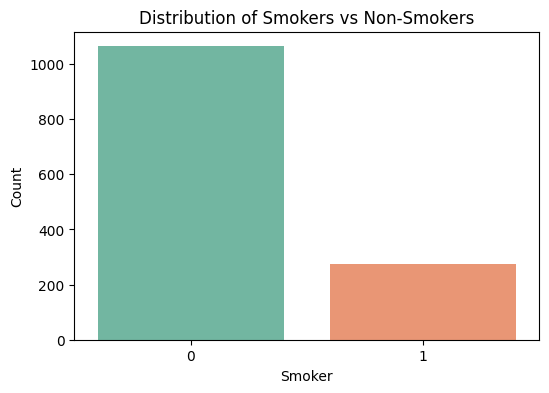

In [10]:
# Countplot for smoker vs non-smoker
plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data=df, palette='Set2')
plt.title('Distribution of Smokers vs Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

The percentage of smoker is comparatively low. But is has strong effect on charges

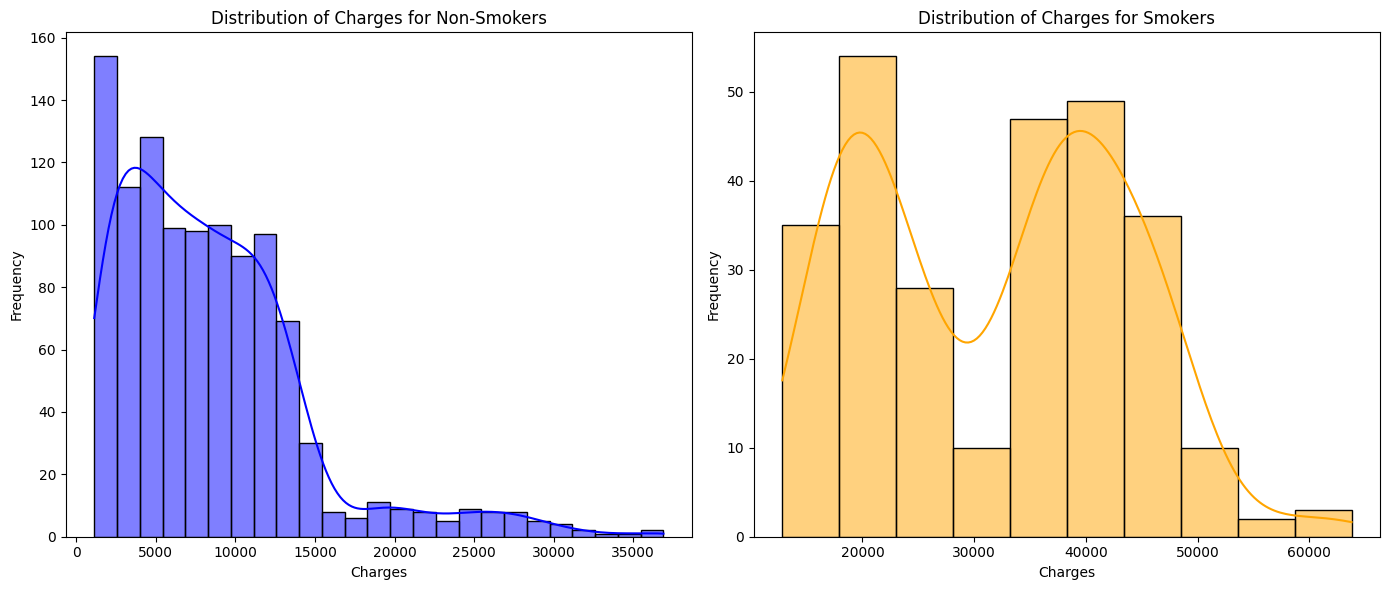

In [11]:
# Filter the DataFrame to include only non-smokers
non_smokers_df = df[df['smoker'] == 0]
smokers_df = df[df['smoker'] == 1]

# Plot the distribution of charges for smokers and non-smokers
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot distribution of charges for non-smokers
plt.subplot(1, 2, 1)
sns.histplot(non_smokers_df['charges'], kde=True, color='blue')
plt.title('Distribution of Charges for Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Plot distribution of charges for smokers
plt.subplot(1, 2, 2)
sns.histplot(smokers_df['charges'], kde=True, color='orange')
plt.title('Distribution of Charges for Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Adjust the spacing between subplots
# Show the plots
plt.tight_layout()
plt.show()

As expected the charges for hospitalization is much greater if the patient is a smoker

<Figure size 1000x800 with 0 Axes>

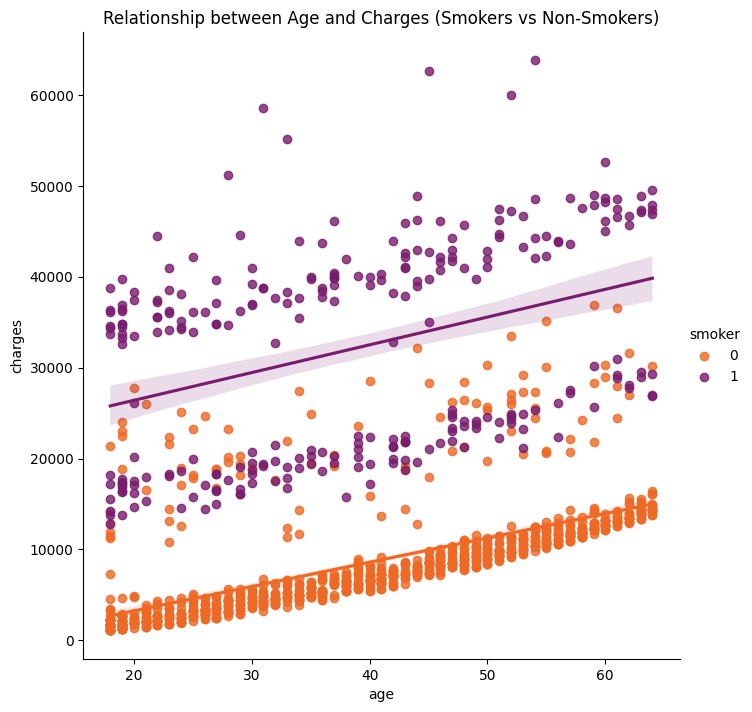

In [12]:
# Create the lmplot
plt.figure(figsize=(10, 8))
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette='inferno_r', height=7)
plt.title('Relationship between Age and Charges (Smokers vs Non-Smokers)')
plt.show()

In non-smokers, we observe that healthcare costs tend to rise with age, which aligns with expectations. This underscores the importance of maintaining good health habits. However, in smokers, this relationship is less apparent. It's worth noting that this observation may not solely reflect smoking habits but also the specific characteristics of the dataset. To accurately assess the significant impact of smoking on healthcare costs, it would be more conclusive to analyze a larger dataset with more diverse variables and a broader sample size.

## **Feature Engineering**



In [13]:
## Dropping columns based on corelation matrix
df = df.drop(['sex', 'region'], axis=1)
df.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


In [26]:
X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target variable

## Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [27]:
# Model 1: Baseline Linear Regression
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False]
}

linreg_grid = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs = -1)
linreg_grid.fit(X_train, y_train)

# Best parameters found by grid search
print("\nBest Parameters found by Grid Search:")
print(linreg_grid.best_params_)

# Evaluate model with best parameters
best_linreg = linreg_grid.best_estimator_
y_pred_grid = best_linreg.predict(X_test)
mse_grid = mean_squared_error(y_test, y_pred_grid)
mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

print("\nLinear Regression Model with Grid Search:")
print("Mean Squared Error (MSE):", mse_grid)
print("Mean Absolute Error (MAE):", mae_grid)
print("R-squared (R2) Score:", r2_grid)


Best Parameters found by Grid Search:
{'copy_X': True, 'fit_intercept': True, 'positive': False}

Linear Regression Model with Grid Search:
Mean Squared Error (MSE): 33981653.95019776
Mean Absolute Error (MAE): 4213.798594527248
R-squared (R2) Score: 0.7811147722517886


In this study, we applied Linear Regression to predict medical charges based on various patient attributes. Through Grid Search with cross-validation, the optimal model parameters were determined to be copy_X=True, fit_intercept=True, and positive=False. The model exhibited robust performance with a Mean Squared Error (MSE) of approximately 33,981,654 and Mean Absolute Error (MAE) of 4,213.80. Moreover, the R-squared (R2) score of 0.7811 indicates that 78.11% of the variance in medical charges can be explained by the selected features. These results suggest that our model captures a significant portion of the variability in medical charges, highlighting its potential utility in healthcare cost predictions.

In [29]:
# Define parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5,
                       scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
rf_grid.fit(X_train, y_train)

# Best parameters found by grid search
print("\nBest Parameters found by Grid Search:")
print(rf_grid.best_params_)

# Evaluate model with best parameters
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Model with Grid Search:")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2) Score:", r2_rf)


Best Parameters found by Grid Search:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

Random Forest Regressor Model with Grid Search:
Mean Squared Error (MSE): 19882540.74579382
Mean Absolute Error (MAE): 2489.9344894663177
R-squared (R2) Score: 0.8719310582782611


In this study, we applied a Random Forest Regressor to predict medical charges based on patient attributes. Through Grid Search with cross-validation, the optimal model hyperparameters were determined as max_depth=10, min_samples_leaf=4, min_samples_split=10, and n_estimators=50. This configuration yielded a highly effective model, achieving a Mean Squared Error (MSE) of approximately 19,882,541 and Mean Absolute Error (MAE) of 2,489.93 on the test set. Furthermore, the model demonstrated a commendable R-squared (R2) score of 0.872, indicating that 87.2% of the variance in medical charges could be explained by the selected features. These results underscore the Random Forest's capability to accurately predict healthcare costs while maintaining robustness against overfitting, highlighting its potential for practical applications in healthcare analytics.

## **Comparision And Conclusion**

Now we compare the results of the Linear Regression model and the optimized Random Forest Regressor based on the metrics obtained:

### Linear Regression Model:
- **Mean Squared Error (MSE)**: 33,981,654
- **Mean Absolute Error (MAE)**: 4,213.80
- **R-squared (R2) Score**: 0.7811

### Random Forest Regressor (Optimized):
- **Mean Squared Error (MSE)**: 19,882,541
- **Mean Absolute Error (MAE)**: 2,489.93
- **R-squared (R2) Score**: 0.872

### Comparison Insights:

1. **Mean Squared Error (MSE)**:
   - The Random Forest Regressor (MSE = 19,882,541) outperforms the Linear Regression model (MSE = 33,981,654) significantly. This indicates that the Random Forest model's predictions are closer to the actual values on average, suggesting better accuracy in predicting medical charges.

2. **Mean Absolute Error (MAE)**:
   - Similarly, the Random Forest Regressor (MAE = 2,489.93) shows lower absolute error compared to the Linear Regression model (MAE = 4,213.80). This means that the Random Forest model's predictions deviate less from the actual charges on average, indicating improved precision.

3. **R-squared (R2) Score**:
   - The Random Forest Regressor (R2 = 0.872) also achieves a higher R-squared score compared to the Linear Regression model (R2 = 0.7811). A higher R-squared score indicates that the Random Forest model explains more variance in medical charges, suggesting a better fit to the data.

### Conclusion:
- The Random Forest Regressor consistently outperforms the Linear Regression model across all evaluation metrics (MSE, MAE, R-squared score).
- This highlights the advantage of using ensemble methods like Random Forests, which can capture complex relationships and interactions among features more effectively than linear models.
- These findings underscore the Random Forest's suitability for healthcare cost prediction tasks, offering improved predictive performance and robustness.

